### POSTTEST 7 KECERDASAN BUATAN


#### Nama : Mochammad Hollan Ardinata Saragih
#### NIM : 2109106103

##### IMPORT LIBRARY

In [28]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import os

Link dataset :
https://drive.google.com/drive/folders/1Eb1mrhQ9F69O2LZykHH_PXM_UIUNAvMK?usp=sharing

Augmentasi gambar

In [3]:
train_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 0.45,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 0.2,
    zoom_range = 0.25,
    horizontal_flip = True,
    fill_mode = 'nearest',
)

# Normalisasi data val dan test
val_datagen = ImageDataGenerator(rescale = 1.0/255.0)
test_datagen = ImageDataGenerator(rescale = 1.0/255.0)

##### Split menjadi test,train,val dan membuat directory.

##### disini saya hanya memakai 4 kelas karena terlalu banyak

In [4]:
import shutil
from sklearn.model_selection import train_test_split

# Path ke direktori utama yang berisi semua folder kelas
dataset_dir = 'dataset_reptile'

# Proporsi pembagian dataset
train_ratio = 0.7  # Proporsi data pelatihan
val_ratio = 0.15  # Proporsi data validasi
test_ratio = 0.15  # Proporsi data pengujian

# Nama-nama folder kelas
class_names = [
 'Gecko',
 'Frog',
 'Crocodile_Alligator',
 'Chameleon',
]

# Membagi data untuk setiap kelas
for class_name in class_names:
    class_dir = os.path.join(dataset_dir, class_name)

    filenames = os.listdir(class_dir)

    train_files, test_val_files = train_test_split(filenames, test_size=(val_ratio + test_ratio), random_state=42)
    val_files, test_files = train_test_split(test_val_files, test_size=test_ratio / (val_ratio + test_ratio), random_state=42)

    # Membuat direktori untuk setiap subset
    train_dir = os.path.join(dataset_dir, 'train', class_name)
    val_dir = os.path.join(dataset_dir, 'val', class_name)
    test_dir = os.path.join(dataset_dir, 'test', class_name)

    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # Menyalin gambar ke direktori subset yang sesuai
    for filename in train_files:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(train_dir, filename)
        shutil.copy(src, dst)

    for filename in val_files:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(val_dir, filename)
        shutil.copy(src, dst)

    for filename in test_files:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(test_dir, filename)
        shutil.copy(src, dst)

In [5]:
# Direktori untuk setiap subset
train_dir = 'dataset_reptile\\test'
val_dir = 'dataset_reptile\\val'
test_dir = 'dataset_reptile\\test'

# Membuat generator data untuk setiap subset
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    shuffle=True,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 256 images belonging to 4 classes.
Found 255 images belonging to 4 classes.


Found 256 images belonging to 4 classes.


Sequential Model

In [40]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Membuat model Sequential
model = Sequential()

# CNN (Feature Extraction Layer)
model.add(Conv2D(128,(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64,(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32,(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Tambahkan layer Flatten
model.add(Flatten())

# DNN (Fully Connected Layer)
model.add(Dense(64,kernel_regularizer='l2',activation='relu'))
# model.add(Dense(32,kernel_regularizer='l2',activation='relu'))
# model.add(Dense(8,kernel_regularizer='l2',activation='relu'))
model.add(Dense(4,kernel_regularizer='l2',activation='softmax'))

# Compile model
model.compile(
    optimizer = 'Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Melatih Model

In [41]:
# Melatih model dengan data menggunakan model.fit()
history = model.fit(train_generator, validation_data=val_generator, epochs=10, verbose=1)

Epoch 1/10
8/8 [==============================] - 15s 2s/step - loss: 2.4440 - accuracy: 0.3672 - val_loss: 2.0335 - val_accuracy: 0.4078
Epoch 2/10
8/8 [==============================] - 13s 2s/step - loss: 1.8900 - accuracy: 0.4062 - val_loss: 1.7060 - val_accuracy: 0.4078
Epoch 3/10
8/8 [==============================] - 12s 2s/step - loss: 1.6266 - accuracy: 0.4062 - val_loss: 1.5313 - val_accuracy: 0.4235
Epoch 4/10
8/8 [==============================] - 12s 2s/step - loss: 1.4901 - accuracy: 0.4336 - val_loss: 1.5108 - val_accuracy: 0.4196
Epoch 5/10
8/8 [==============================] - 12s 2s/step - loss: 1.4327 - accuracy: 0.4688 - val_loss: 1.3869 - val_accuracy: 0.4667
Epoch 6/10
8/8 [==============================] - 12s 2s/step - loss: 1.3568 - accuracy: 0.5000 - val_loss: 1.3985 - val_accuracy: 0.4745
Epoch 7/10
8/8 [==============================] - 13s 2s/step - loss: 1.3291 - accuracy: 0.4961 - val_loss: 1.2969 - val_accuracy: 0.4784
Epoch 8/10
8/8 [==================

Evaluasi model

In [42]:
# Evaluasi model terhadap data pengujian
test_loss, test_accuracy = model.evaluate(test_generator)

print(f'Loss on test data: {test_loss}')
print(f'Accuracy on test data: {test_accuracy}')

8/8 [==============================] - 2s 286ms/step - loss: 1.1652 - accuracy: 0.5742
Loss on test data: 1.1651991605758667
Accuracy on test data: 0.57421875


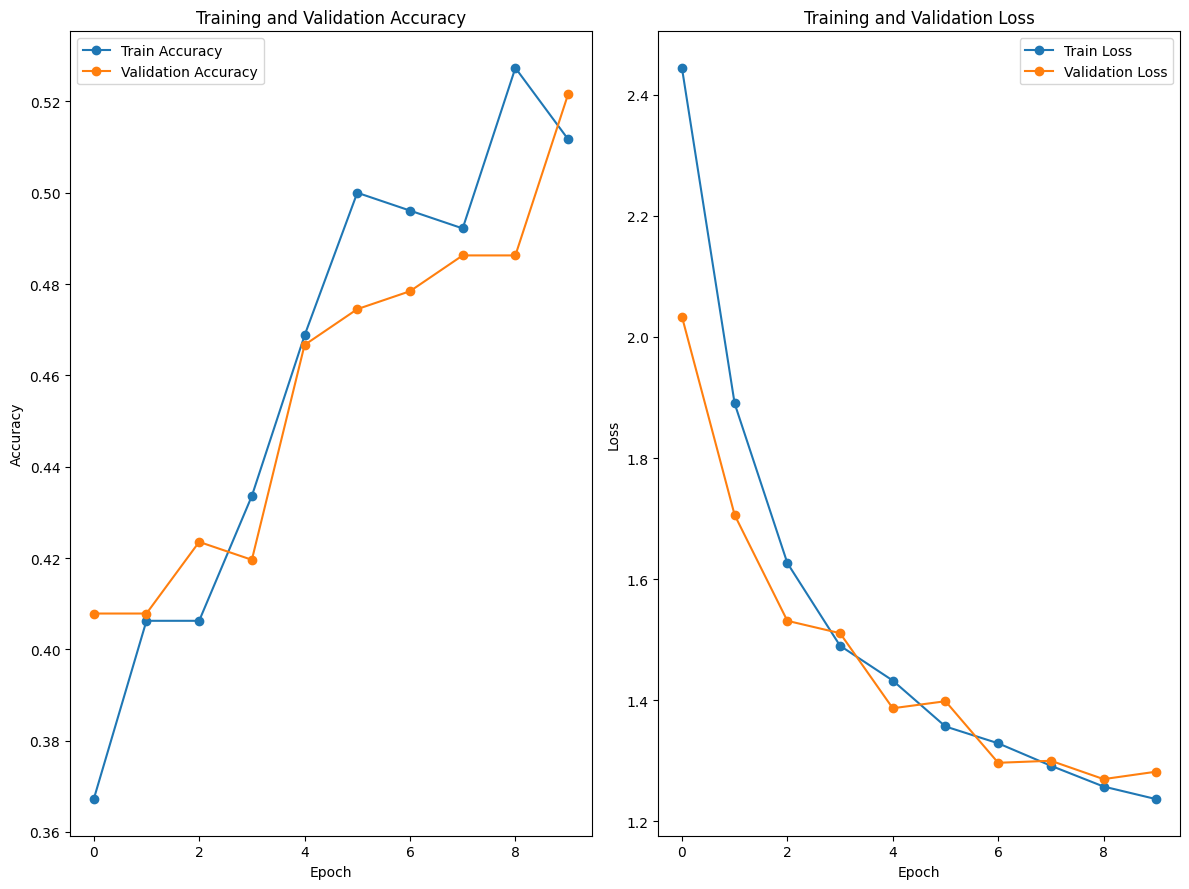

In [43]:
import matplotlib.pyplot as plt

# Dapatkan metrik dari history pelatihan
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot metrik akurasi
plt.figure(figsize=(12, 9))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Train Accuracy', marker='o')
plt.plot(val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot metrik loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss', marker='o')
plt.plot(val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()